In [30]:
import pandas as pd
import joblib
import warnings
warnings.filterwarnings("ignore")
# Load the dataset
data = pd.read_csv("final_data.csv")
data.head()

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,storey_mean
0,1.327969,103.922716,1,CHAI CHEE ROAD,461001,1 CHAI CHEE RD,9375.220678,915.936076,1990-01,BEDOK,5 ROOM,1,CHAI CHEE RD,07 TO 09,132.0,model a,1983,142000.0,92,8.0
1,1.327969,103.922716,1,CHAI CHEE ROAD,461001,1 CHAI CHEE RD,9375.220678,915.936076,1990-08,BEDOK,5 ROOM,1,CHAI CHEE RD,01 TO 03,133.0,model a,1983,130000.0,92,2.0
2,1.327969,103.922716,1,CHAI CHEE ROAD,461001,1 CHAI CHEE RD,9375.220678,915.936076,1990-10,BEDOK,5 ROOM,1,CHAI CHEE RD,07 TO 09,132.0,model a,1983,150000.0,92,8.0
3,1.327969,103.922716,1,CHAI CHEE ROAD,461001,1 CHAI CHEE RD,9375.220678,915.936076,1991-01,BEDOK,5 ROOM,1,CHAI CHEE RD,04 TO 06,133.0,model a,1983,141000.0,91,5.0
4,1.327969,103.922716,1,CHAI CHEE ROAD,461001,1 CHAI CHEE RD,9375.220678,915.936076,1991-07,BEDOK,5 ROOM,1,CHAI CHEE RD,01 TO 03,133.0,model a,1983,163000.0,91,2.0


In [31]:
data.describe(percentiles=[0.10])

,latitude,longitude,postal_code,cbd_dist,min_dist_mrt,block,floor_area_sqm,lease_commence_date,resale_price,remaining_lease,storey_mean
count,69706.000000,69706.000000,69706.000000,69706.000000,69706.000000,69706.000000,69706.000000,69706.000000,6.970600e+04,69706.000000,69706.000000
mean,1.337060,103.864336,459791.573695,9288.530488,708.163524,265.215548,79.887934,1979.313976,2.340890e+05,74.787350,7.522208
std,0.030784,0.060613,161321.333530,2941.074875,281.334725,214.507607,21.299470,3.601692,1.312585e+05,9.939749,4.072213
min,1.270919,103.740909,80003.000000,1419.564382,53.926795,1.000000,28.000000,1967.000000,5.000000e+03,41.000000,2.000000
10%,1.283422,103.757239,150128.000000,3588.832141,334.833030,30.000000,64.000000,1976.000000,8.000000e+04,60.000000,2.000000
50%,1.334061,103.853455,464029.000000,9839.409655,706.269064,169.000000,73.000000,1979.000000,2.080000e+05,77.000000,8.000000
max,1.382441,103.946090,669595.000000,14175.657348,2008.782866,725.000000,178.000000,1986.000000,1.300000e+06,95.000000,26.000000


In [32]:
data.isnull().sum()

latitude               0
longitude              0
blk_no                 0
road_name              0
postal_code            0
address                0
cbd_dist               0
min_dist_mrt           0
month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
storey_mean            0
dtype: int64

In [33]:
data['flat_type'].unique()

array(['5 ROOM', '4 ROOM', '3 ROOM', 'EXECUTIVE', '2 ROOM', '1 ROOM'],
      dtype=object)

In [34]:
data['flat_model'].unique()

array(['model a', 'improved', 'new generation', 'adjoined flat',
       'standard', 'apartment', 'maisonette', 'simplified', '2-room',
       'model a-maisonette'], dtype=object)

In [35]:
# Drop unnecessary columns
data = data.drop(columns=['blk_no','road_name','postal_code','address','month','flat_model','flat_type','town','block','street_name','storey_range'], axis = 1)

In [36]:
data.head()

,latitude,longitude,cbd_dist,min_dist_mrt,floor_area_sqm,lease_commence_date,resale_price,remaining_lease,storey_mean
0,1.327969,103.922716,9375.220678,915.936076,132.0,1983,142000.0,92,8.0
1,1.327969,103.922716,9375.220678,915.936076,133.0,1983,130000.0,92,2.0
2,1.327969,103.922716,9375.220678,915.936076,132.0,1983,150000.0,92,8.0
3,1.327969,103.922716,9375.220678,915.936076,133.0,1983,141000.0,91,5.0
4,1.327969,103.922716,9375.220678,915.936076,133.0,1983,163000.0,91,2.0


In [37]:
# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Function to plot box, distribution, and violin plots for a specific column
def plot(data, column):
    # Box plot
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=data, x=column)
    plt.title(f'Box Plot for {column}')
    # Histogram with Kernel Density Estimate (KDE)
    plt.subplot(1,3,2)
    sns.histplot(data=data, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')
    # Violin plot
    plt.subplot(1,3,3)
    sns.violinplot(data=data, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

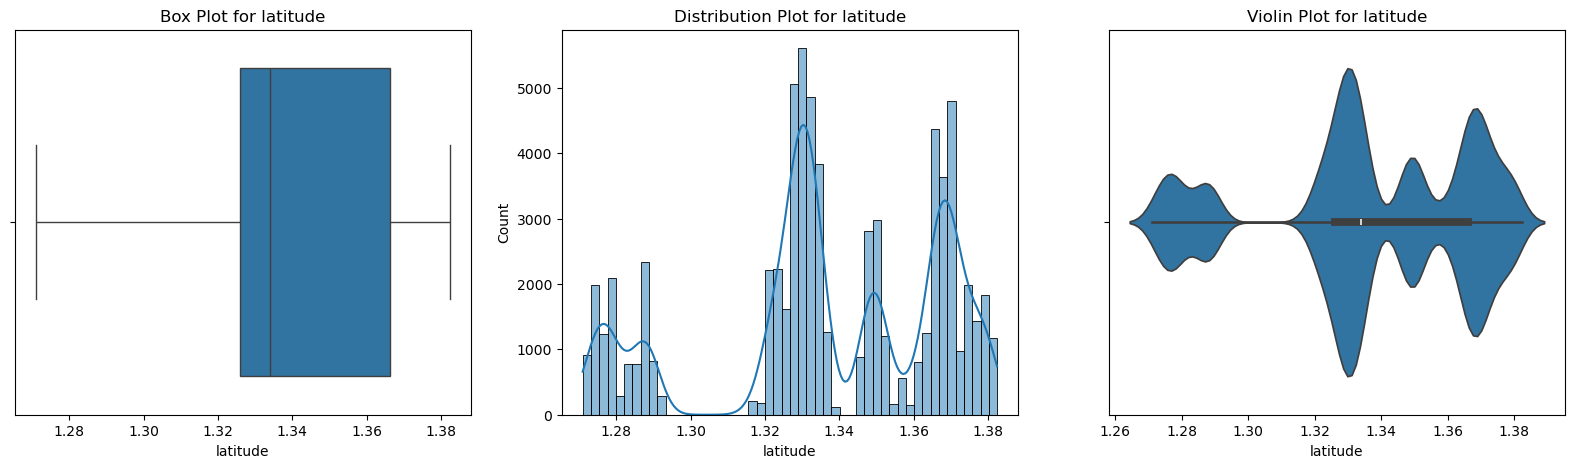

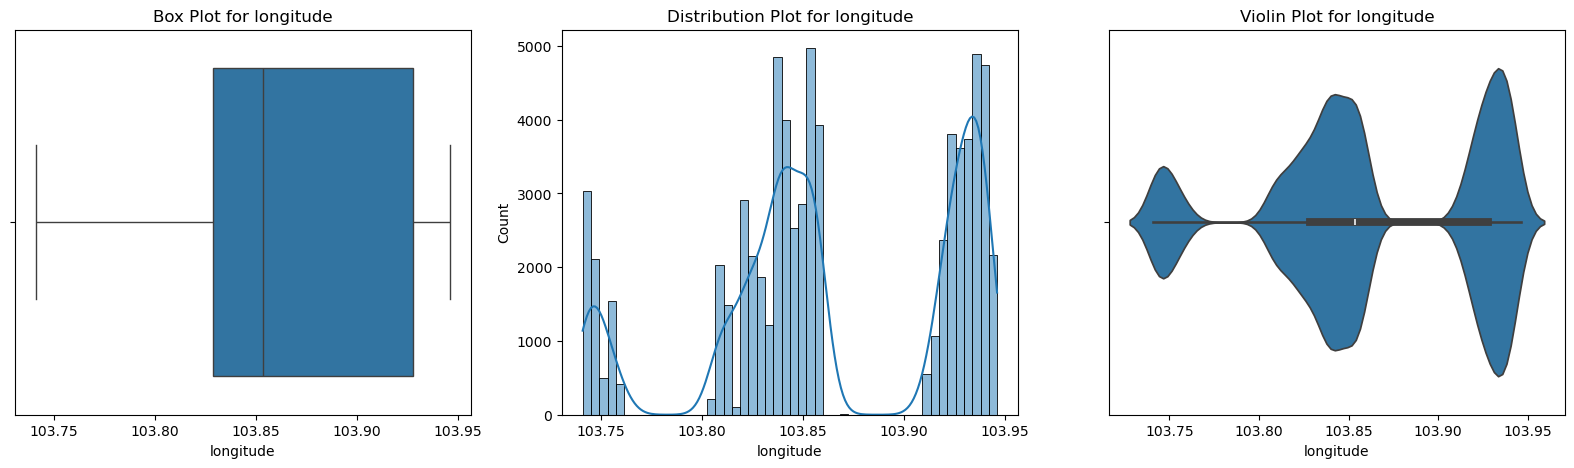

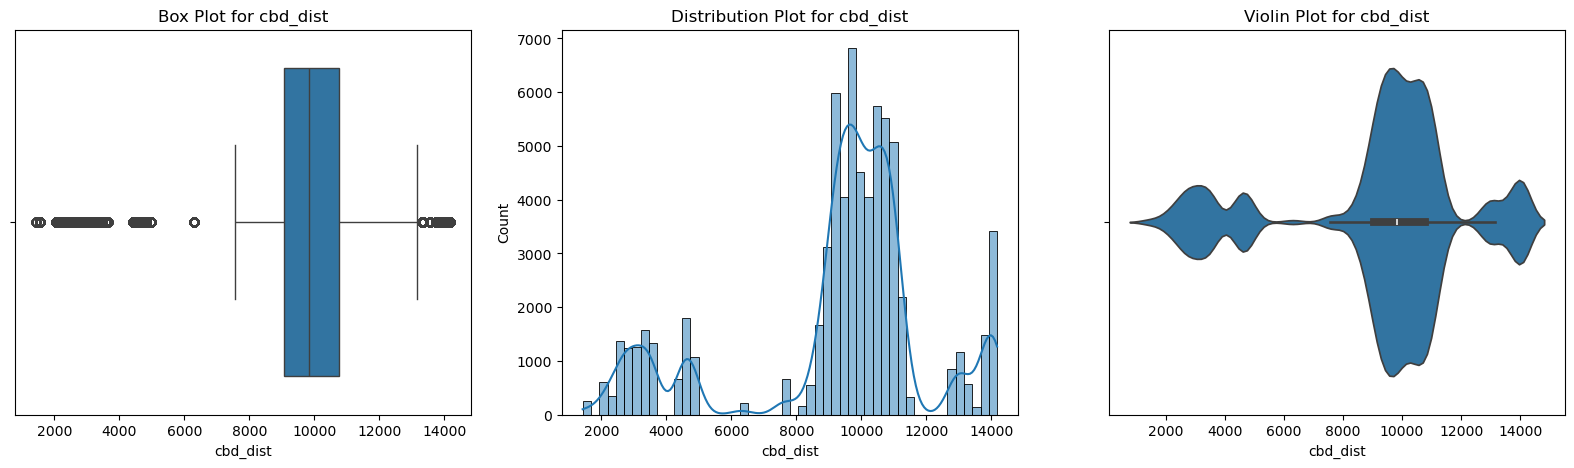

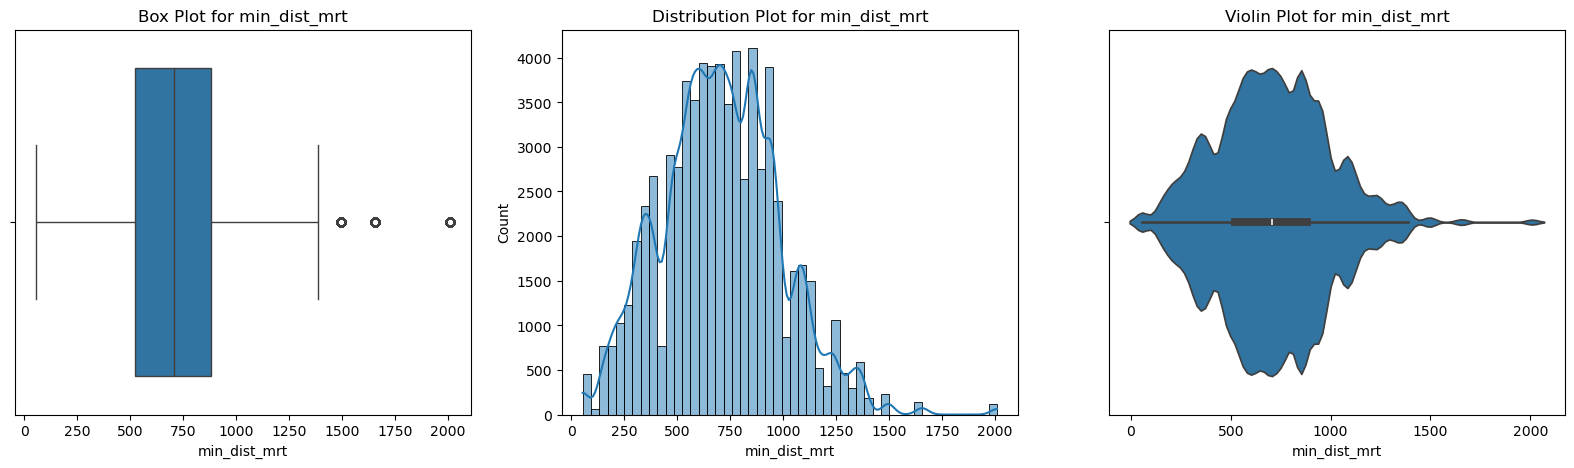

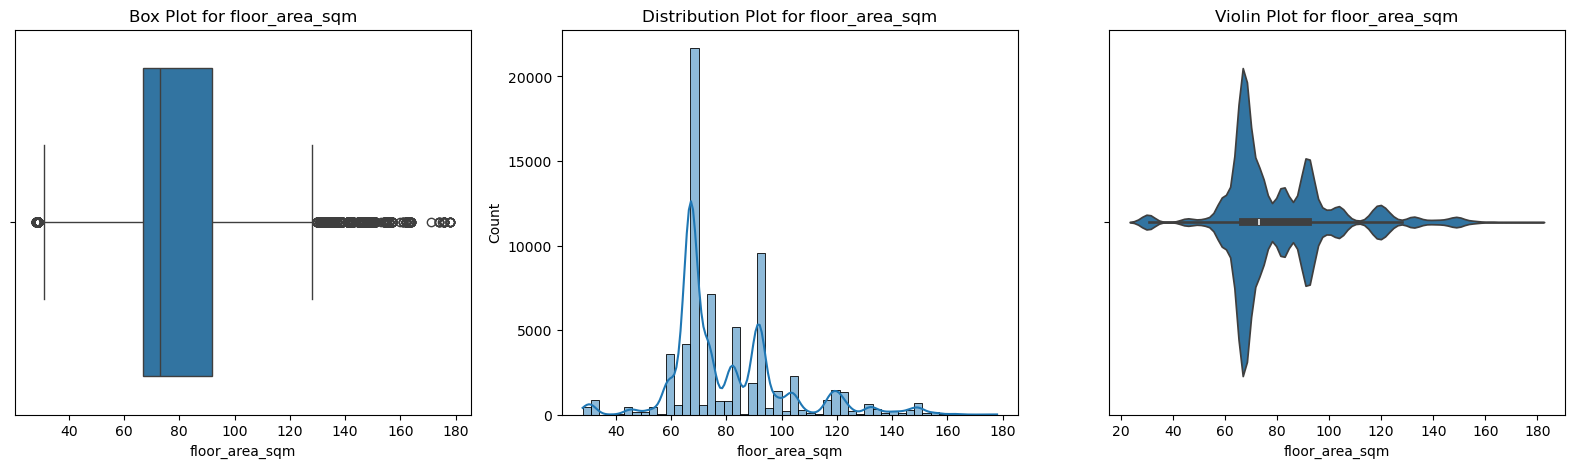

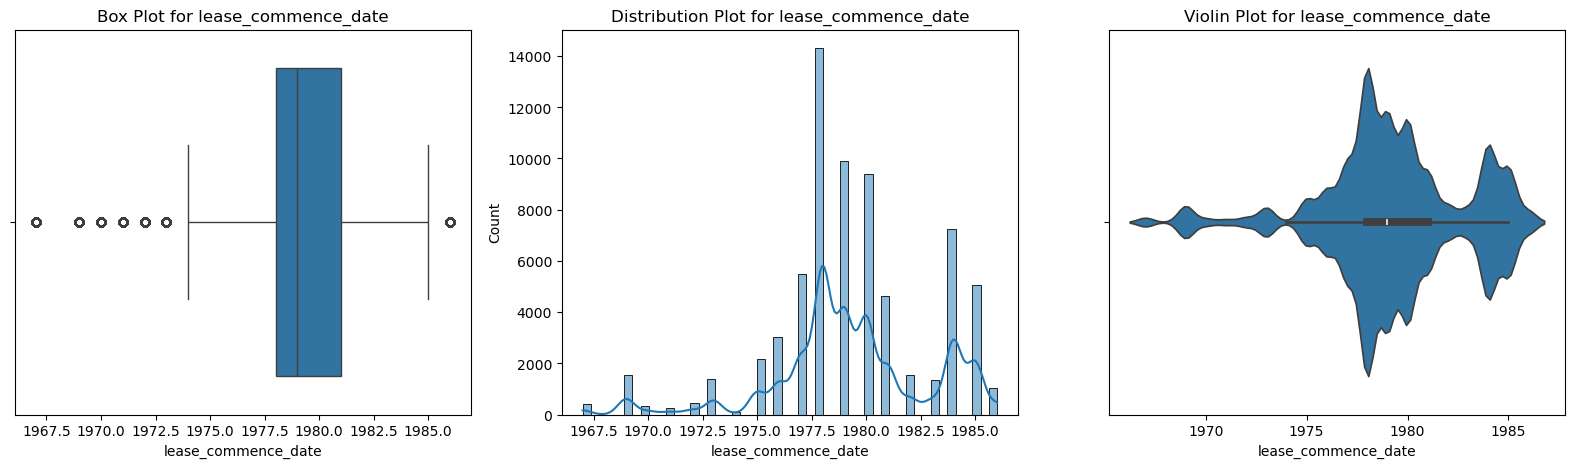

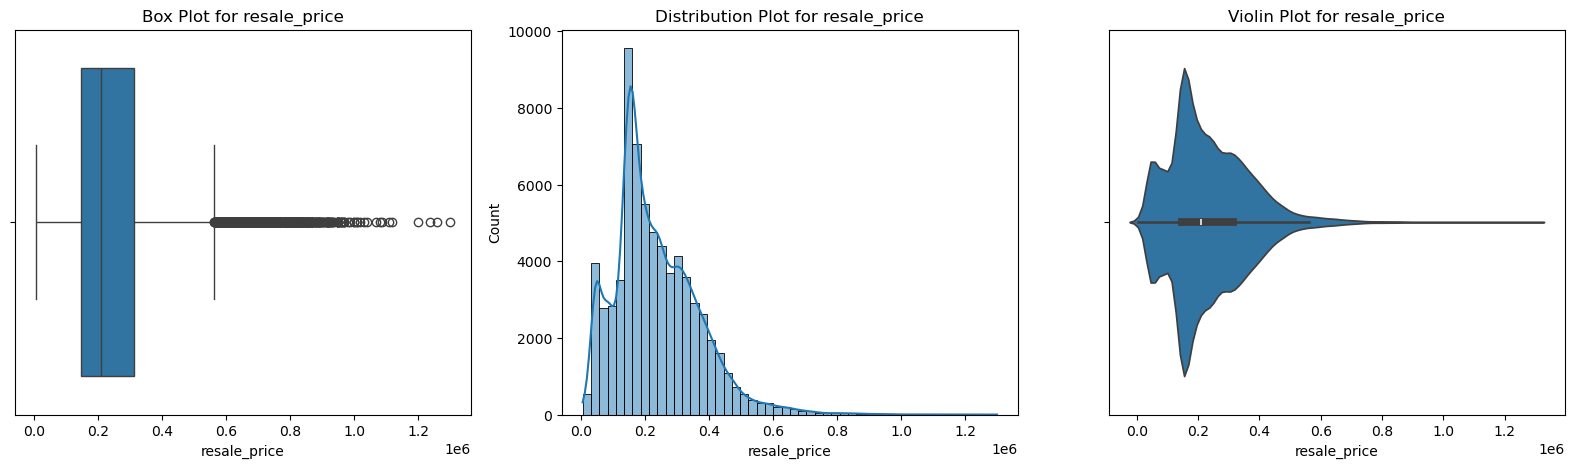

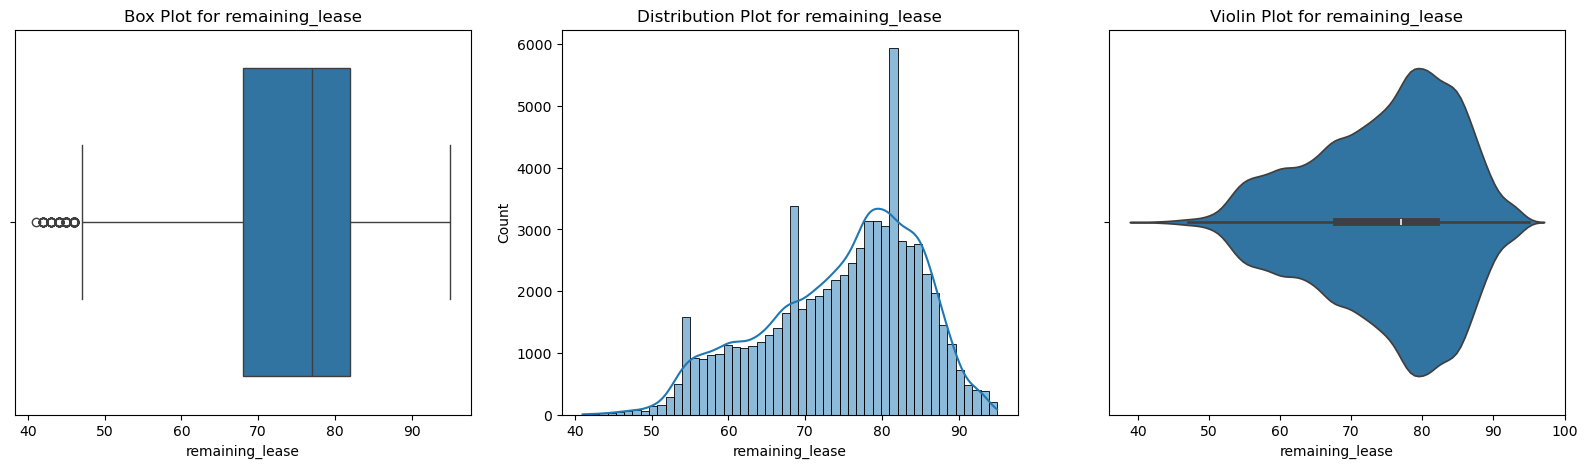

In [213]:
for i in ['latitude','longitude','cbd_dist','min_dist_mrt','floor_area_sqm','lease_commence_date','resale_price','remaining_lease']:
    plot(data, i)

In [39]:
# Function to remove outliers based on IQR
def remove_outliers(df, column):
    # Calculate the 20th and 80th percentiles
    P20 = df[column].quantile(0.25)
    P80 = df[column].quantile(0.75)
    IQR = P80 - P20

    # Define outlier thresholds
    lower_bound = P20 - 1.5 * IQR
    upper_bound = P80 + 1.5 * IQR

    # Remove outliers
    df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_clean

In [40]:
# Remove outliers for selected columns
columns_to_process = ['cbd_dist','min_dist_mrt','floor_area_sqm','lease_commence_date','resale_price','remaining_lease']
for column in columns_to_process:
    data = remove_outliers(data, column)

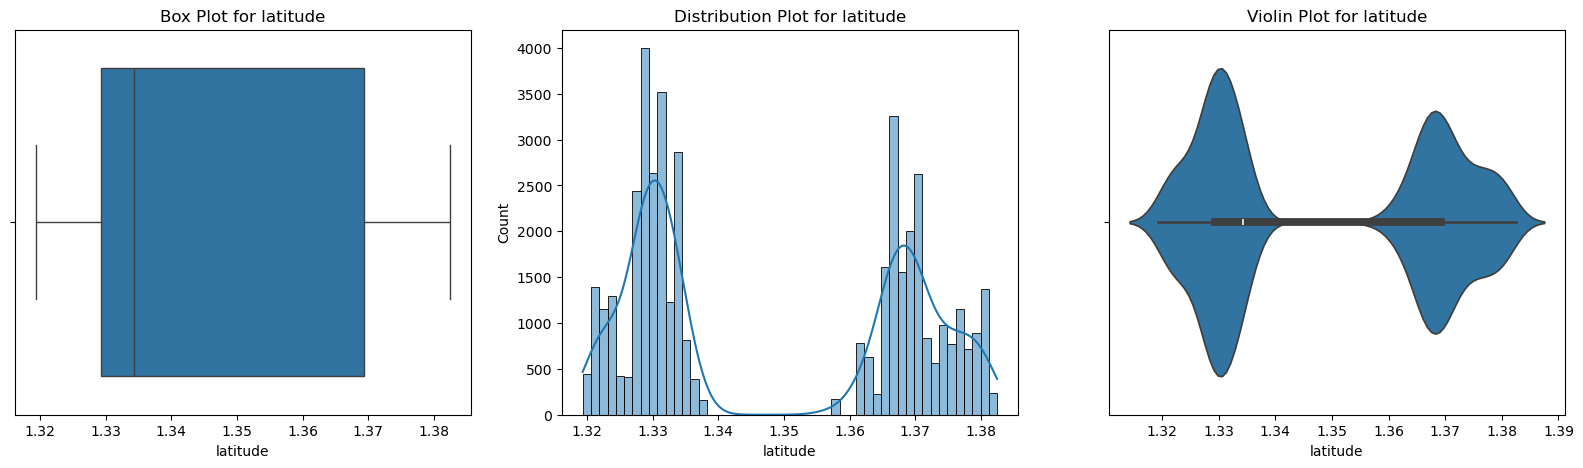

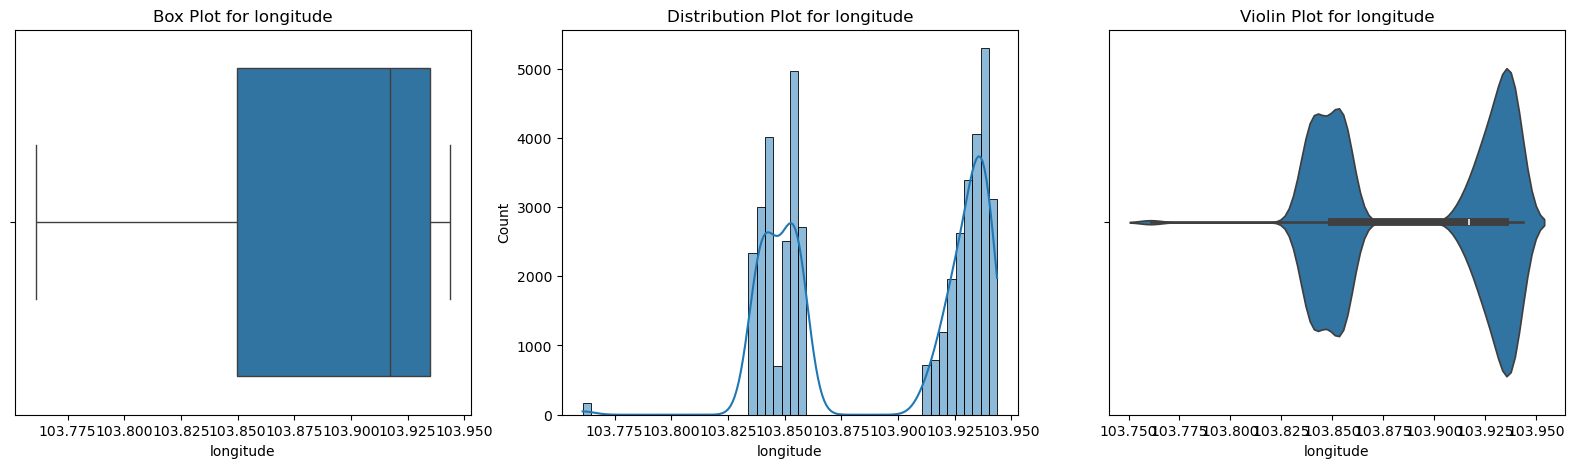

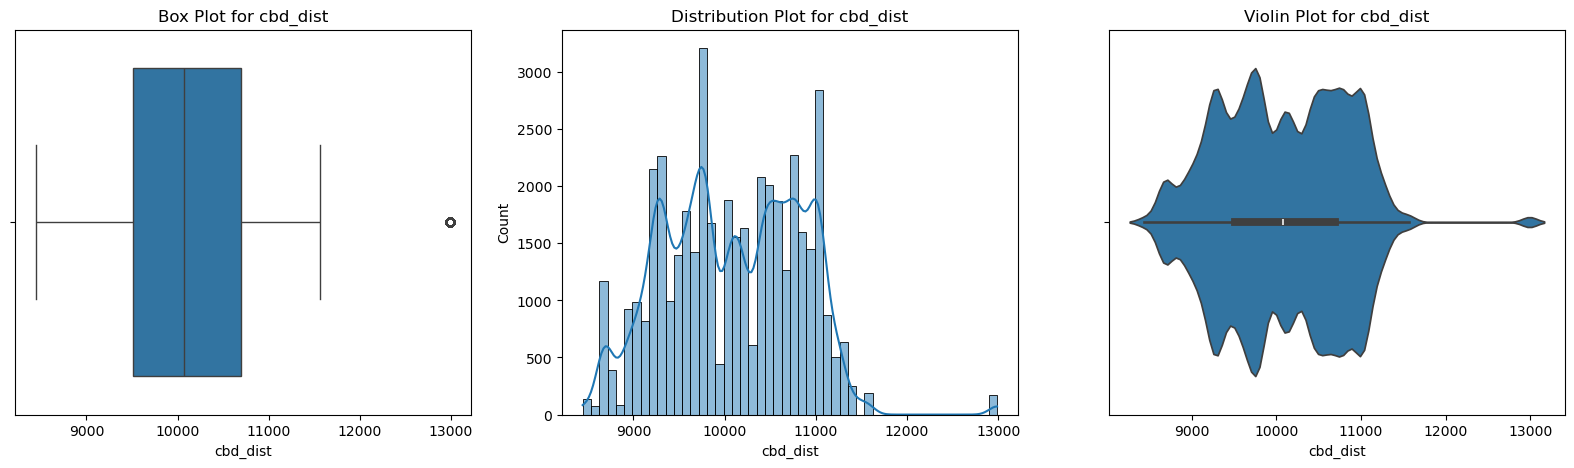

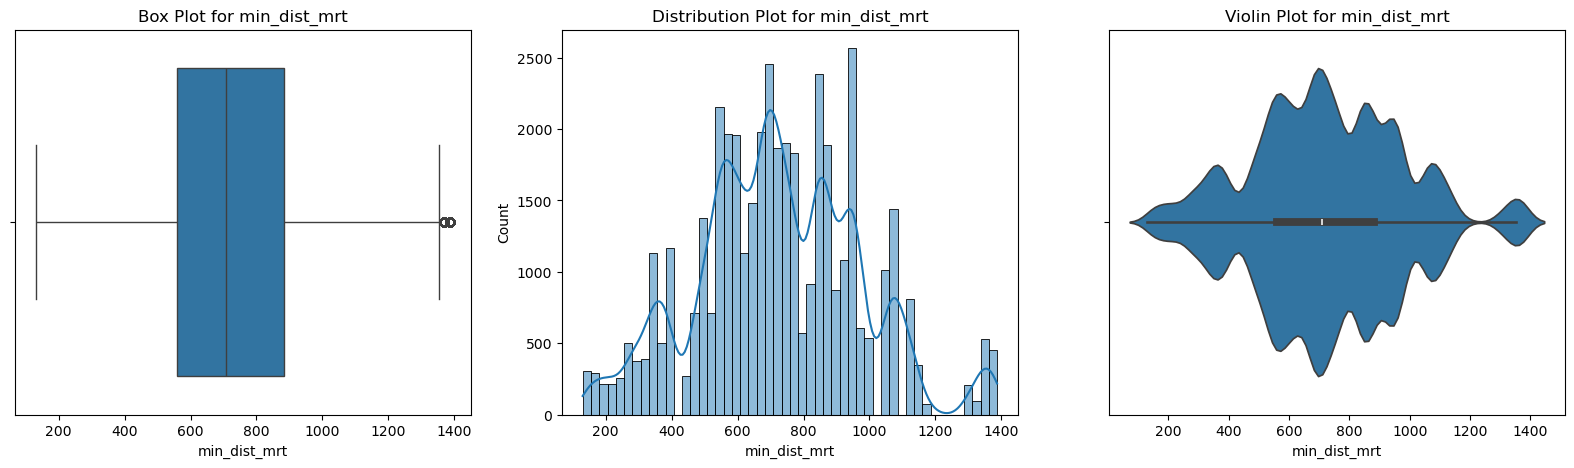

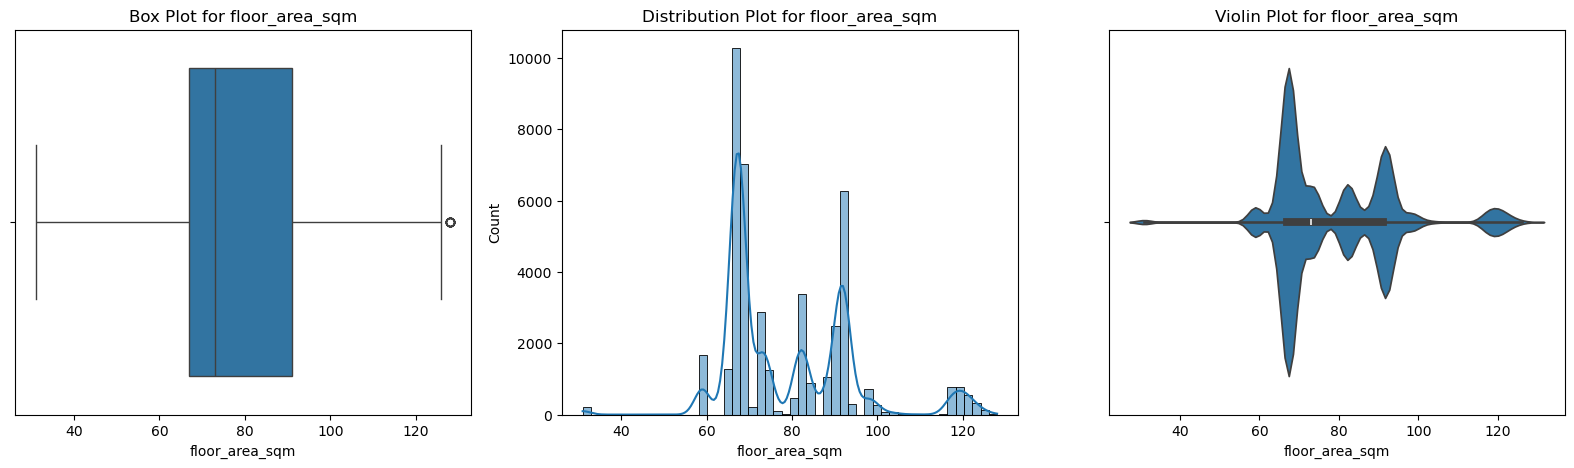

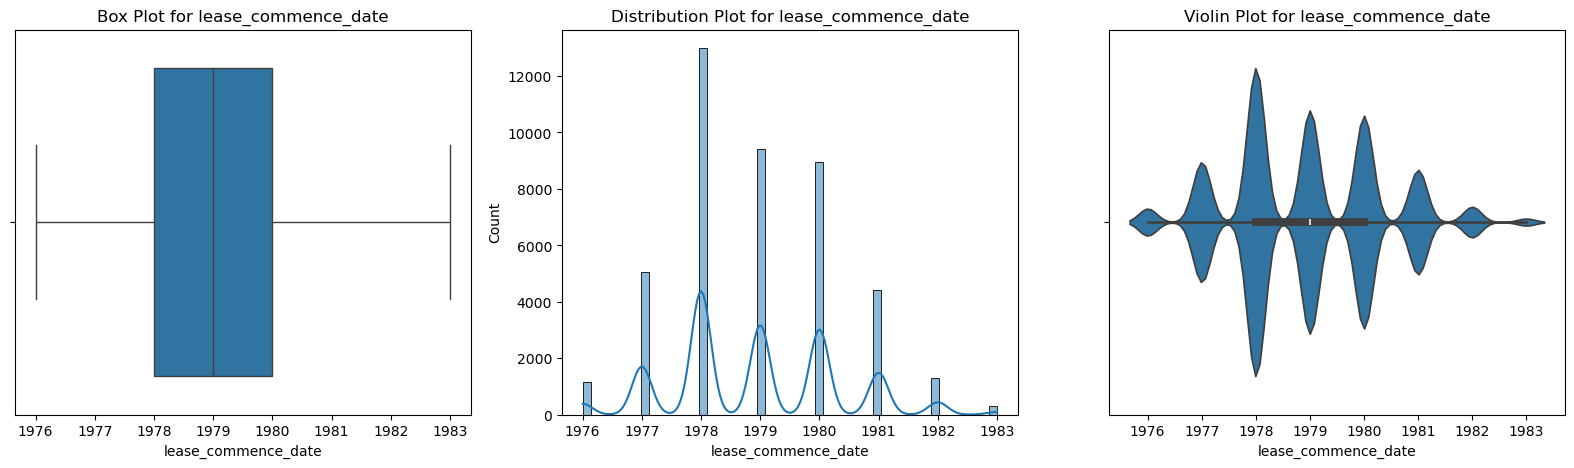

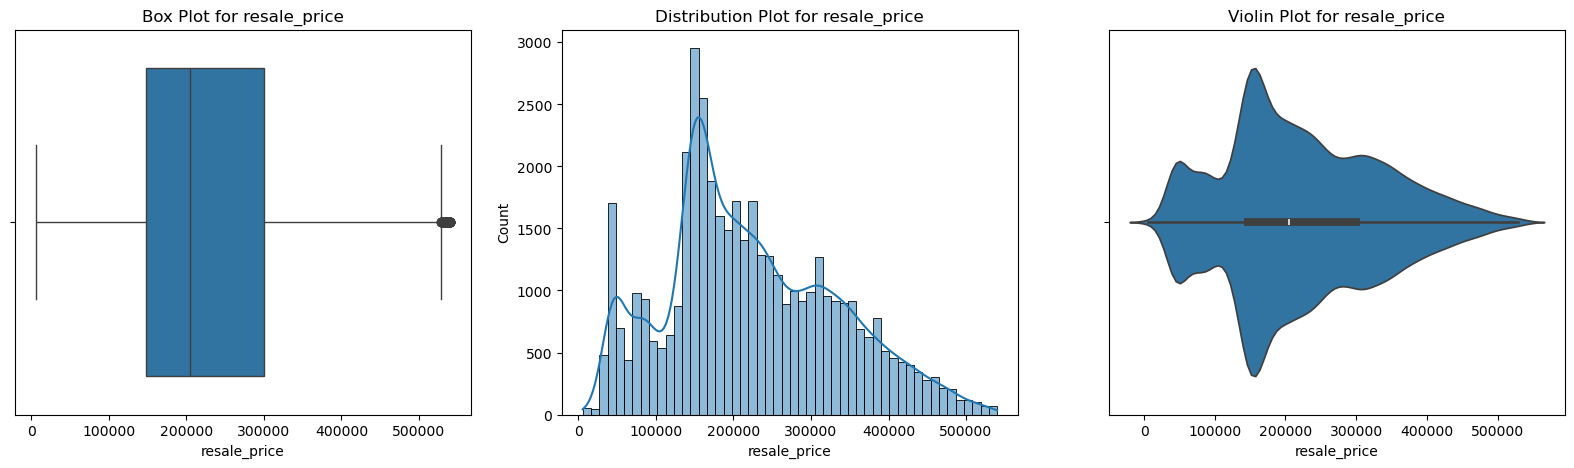

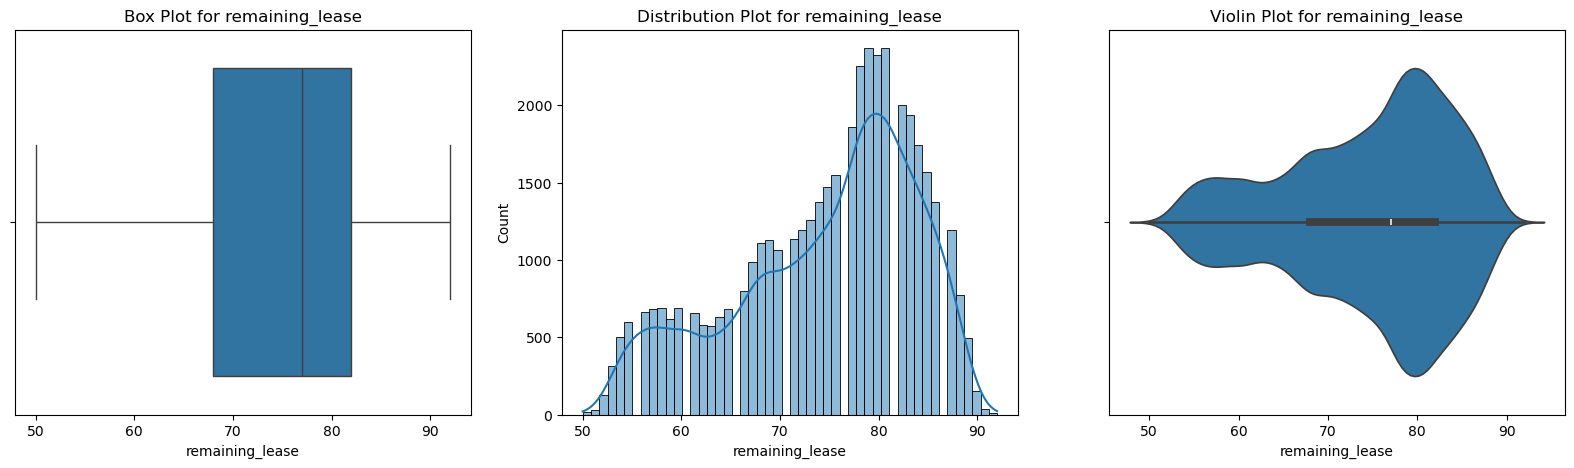

In [216]:
for i in ['latitude','longitude','cbd_dist','min_dist_mrt','floor_area_sqm','lease_commence_date','resale_price','remaining_lease']:
    plot(data, i)

In [10]:
# Import necessary libraries for data transformation
from sklearn.preprocessing import PowerTransformer
import numpy as np

In [41]:
# Apply Box-Cox Power Transformation to 'remaining_lease' and 'resale_price'
transformer = PowerTransformer(method='box-cox')
data['remaining_lease'] = transformer.fit_transform(data['remaining_lease'].values.reshape(-1, 1))
data['resale_price'] = transformer.fit_transform(data['resale_price'].values.reshape(-1,1))

In [42]:
# Apply log transformation to selected columns
columns_to_transform = [
    'latitude','longitude','cbd_dist', 'min_dist_mrt',
    'floor_area_sqm', 'lease_commence_date']

for column in columns_to_transform:
    data[column] = np.log(data[column] + 1) 

In [43]:
data.head()

,latitude,longitude,cbd_dist,min_dist_mrt,floor_area_sqm,lease_commence_date,resale_price,remaining_lease,storey_mean
18,0.844996,4.653224,9.145932,6.821038,4.644391,7.59287,-0.501487,1.901982,5.0
28,0.844996,4.653224,9.145932,6.821038,4.644391,7.59287,-0.254842,1.565455,5.0
49,0.844996,4.653224,9.145932,6.821038,4.644391,7.59287,1.061612,1.246445,5.0
58,0.844996,4.653224,9.145932,6.821038,4.644391,7.59287,0.631716,1.093342,5.0
67,0.844996,4.653224,9.145932,6.821038,4.644391,7.59287,0.378668,0.944420,5.0


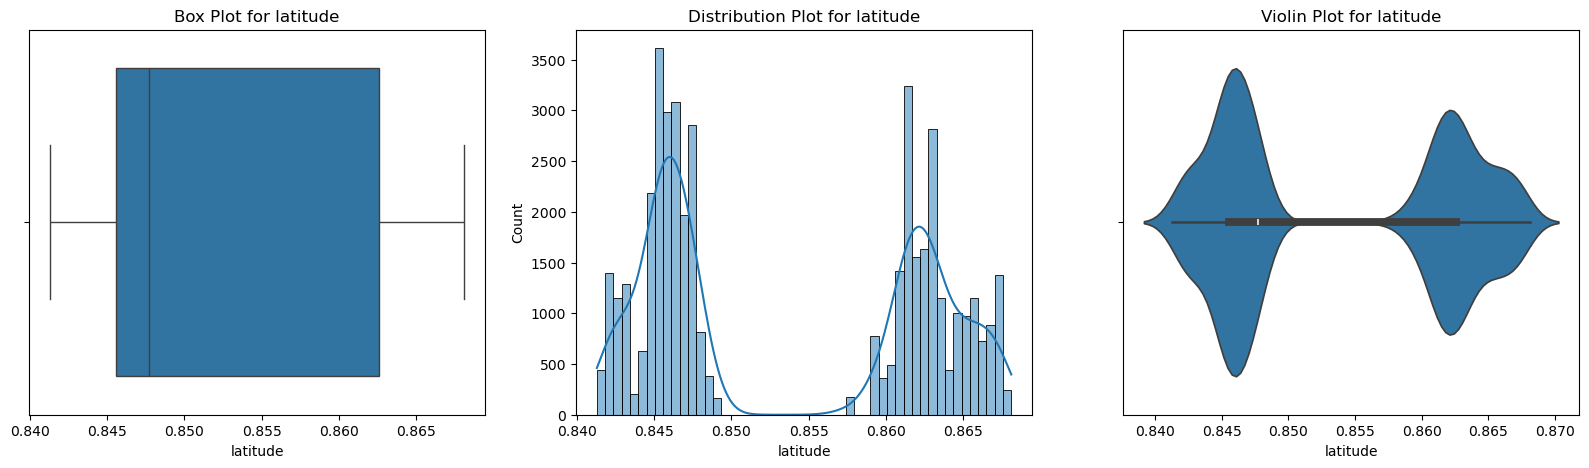

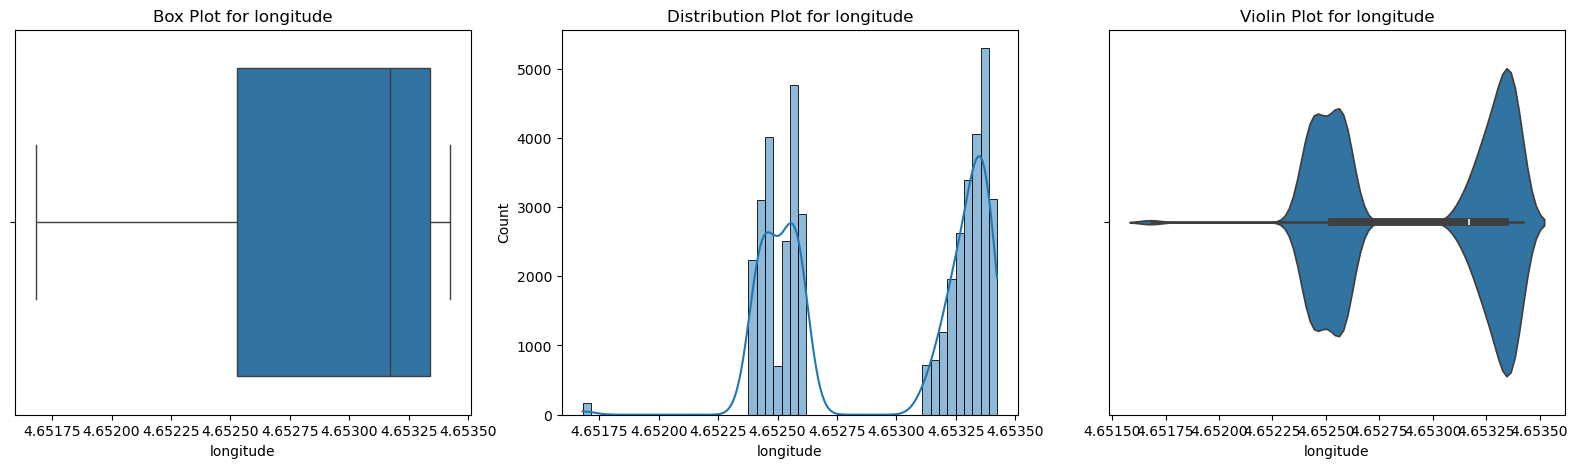

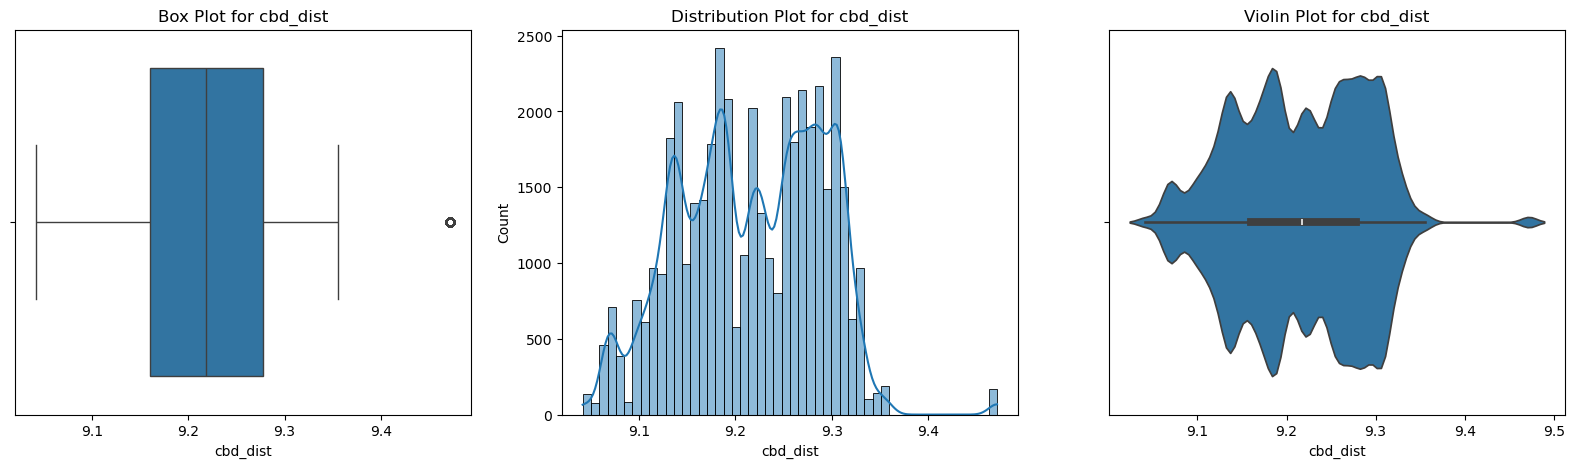

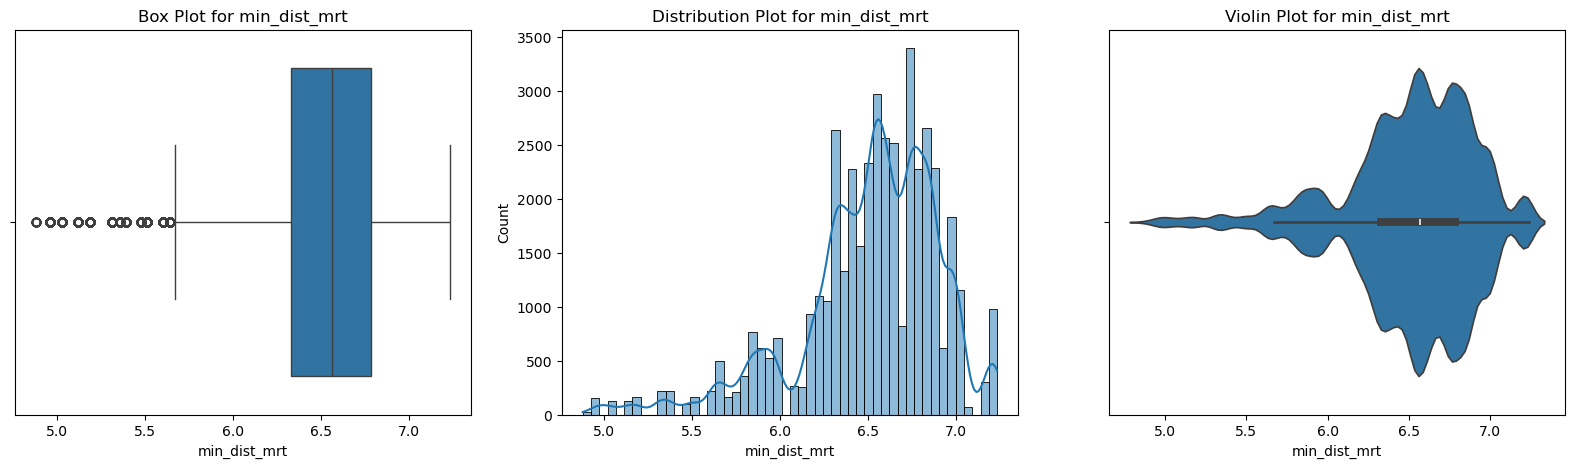

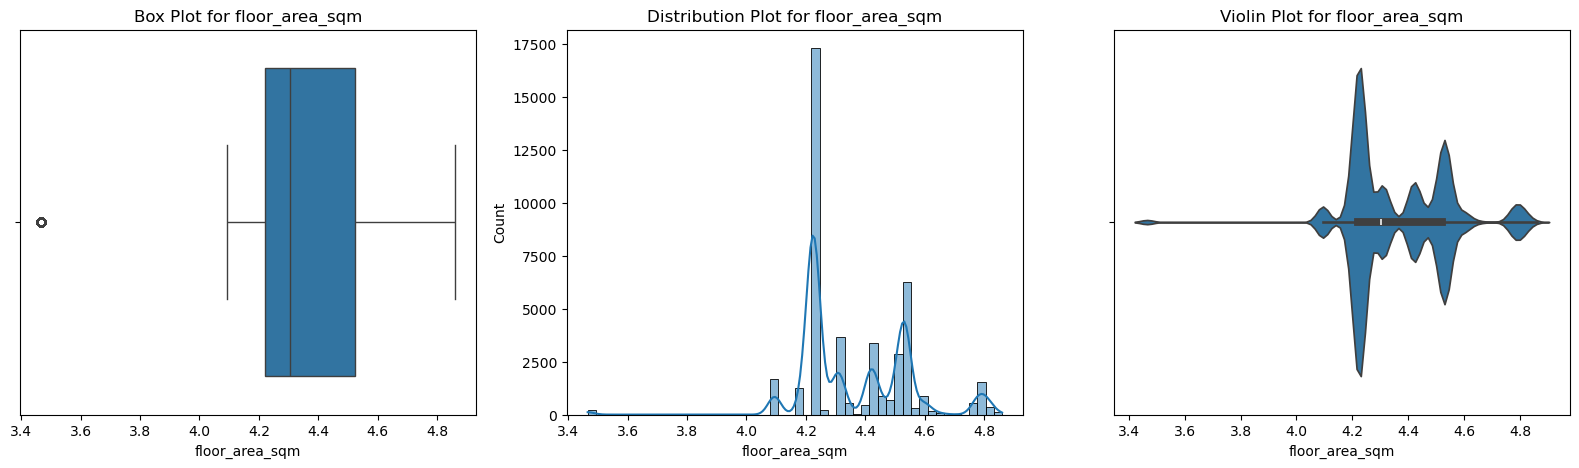

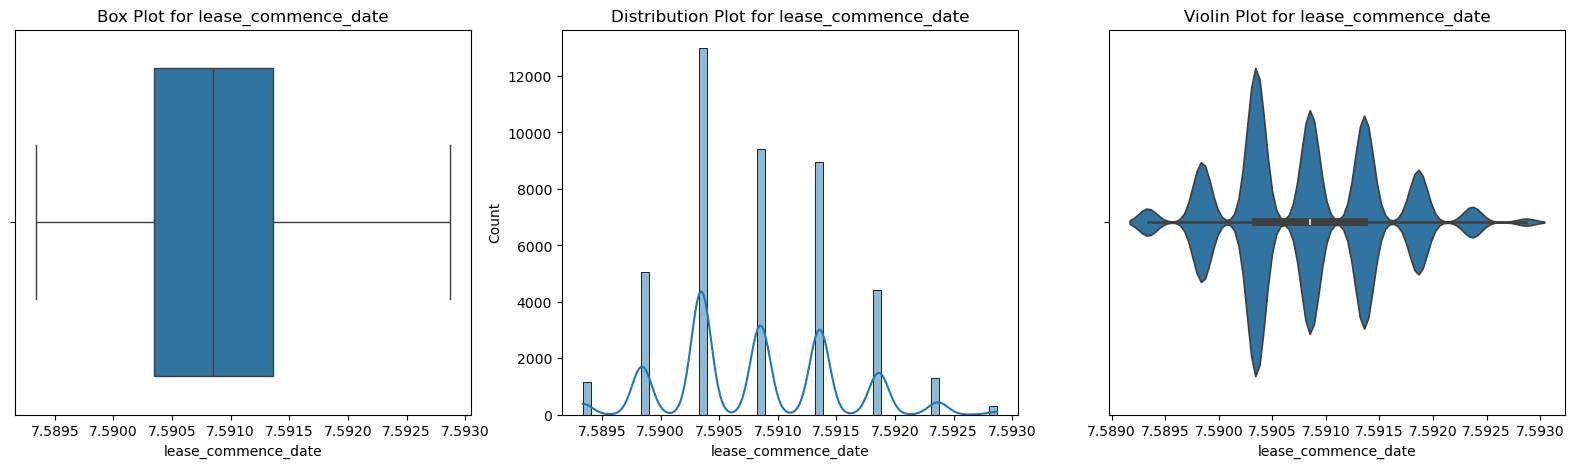

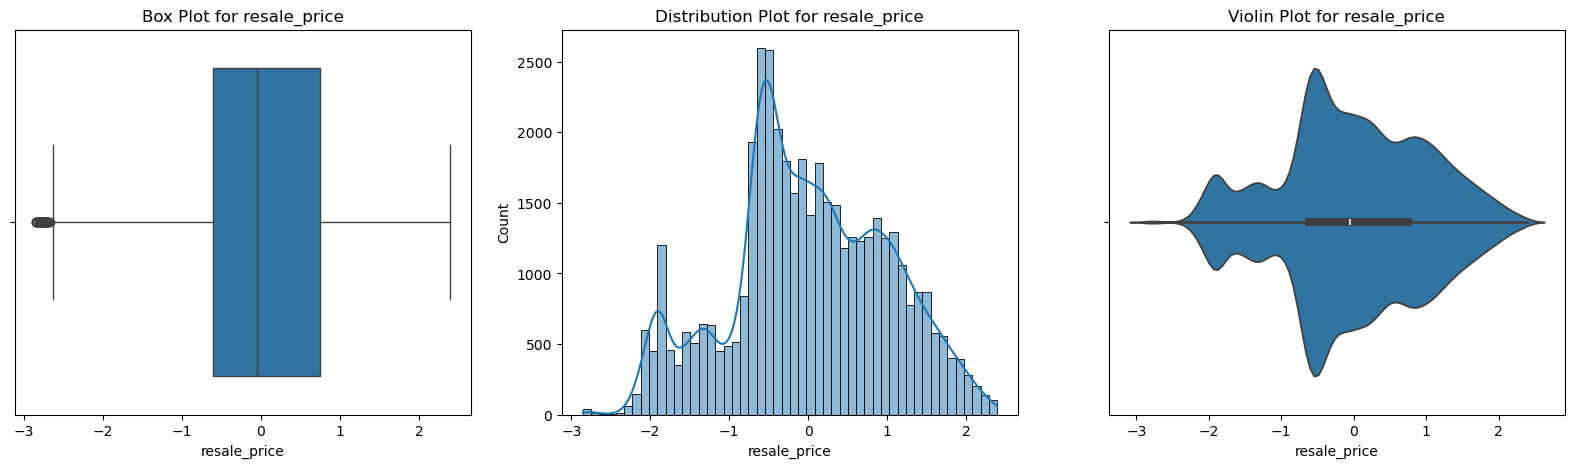

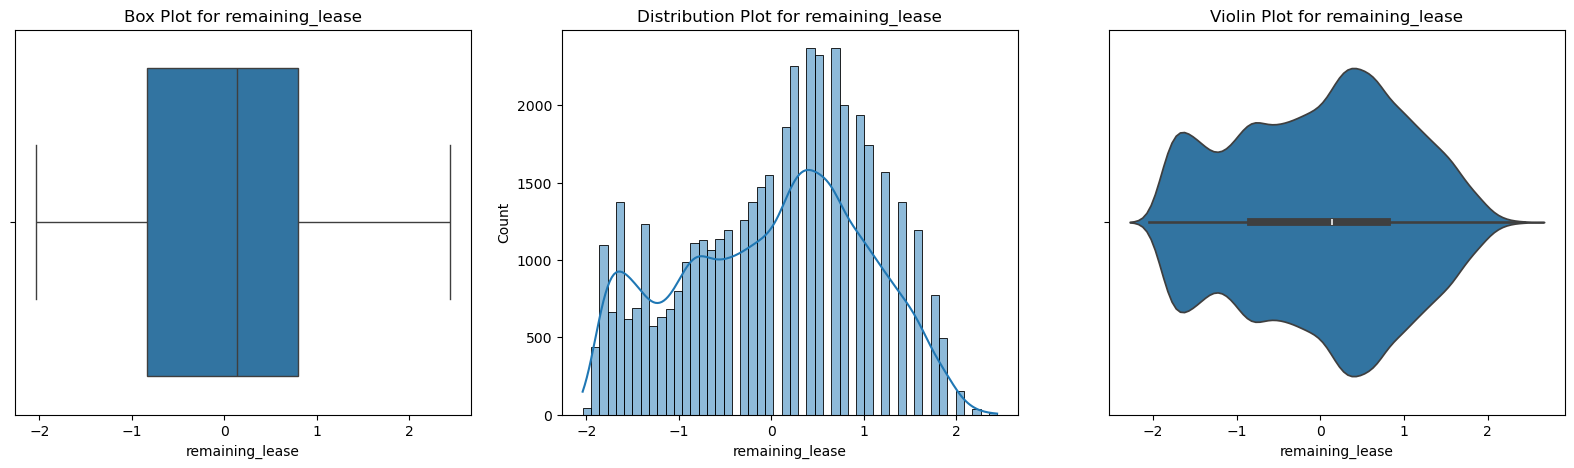

In [308]:
for i in ['latitude','longitude','cbd_dist','min_dist_mrt','floor_area_sqm','lease_commence_date','resale_price','remaining_lease']:
    plot(data, i)

In [44]:
# Importing required libraries for model training
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, precision_score
from sklearn.model_selection import train_test_split

<Axes: >

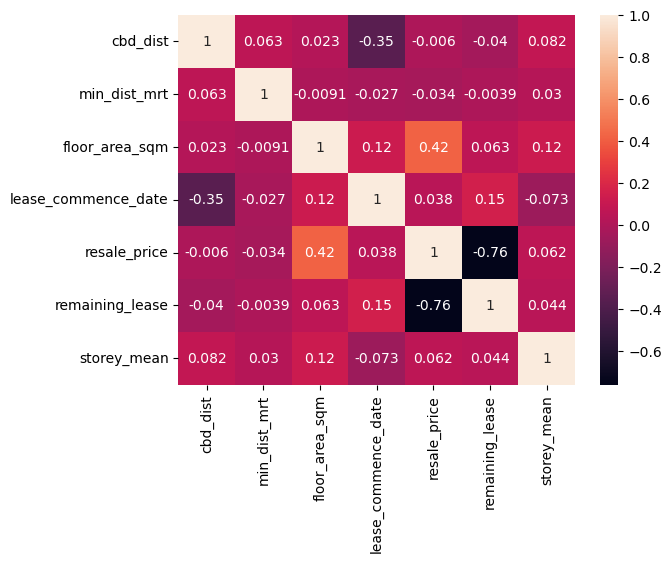

In [45]:
#Checking for correlation between columns
col = ['cbd_dist','min_dist_mrt','floor_area_sqm','lease_commence_date','resale_price','remaining_lease','storey_mean']
data_heatmap = data[col].corr()
sns.heatmap(data_heatmap, annot=True)

In [46]:
# Function to define features and target variable
def features(data):
    X = data.drop(columns =['resale_price'],axis = 1)
    y = data['resale_price']
    return X, y

In [47]:
# Split data into training and testing sets
X, y = features(data)

In [48]:
X

,latitude,longitude,cbd_dist,min_dist_mrt,floor_area_sqm,lease_commence_date,remaining_lease,storey_mean
18,0.844996,4.653224,9.145932,6.821038,4.644391,7.592870,1.901982,5.0
28,0.844996,4.653224,9.145932,6.821038,4.644391,7.592870,1.565455,5.0
49,0.844996,4.653224,9.145932,6.821038,4.644391,7.592870,1.246445,5.0
58,0.844996,4.653224,9.145932,6.821038,4.644391,7.592870,1.093342,5.0
67,0.844996,4.653224,9.145932,6.821038,4.644391,7.592870,0.944420,5.0
...,...,...,...,...,...,...,...,...
69496,0.847268,4.653392,9.338040,6.854361,4.795791,7.590347,-1.404696,11.0
69497,0.847268,4.653392,9.338040,6.854361,4.820282,7.590347,-1.404696,8.0
69499,0.847268,4.653392,9.338040,6.854361,4.820282,7.590347,-1.607930,5.0
69500,0.847268,4.653392,9.338040,6.854361,4.836282,7.590347,-1.730528,2.0


In [49]:
y

18      -0.501487
28      -0.254842
49       1.061612
58       0.631716
67       0.378668
           ...   
69496    2.226654
69497    2.381453
69499    2.144927
69500    1.887771
69501    2.081461
Name: resale_price, Length: 43554, dtype: float64

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 14)

In [51]:
# Initialize scalers
scaler = StandardScaler()
mscaler = MinMaxScaler()

In [52]:
# Function to scale data
def scaled_data(X_train, X_test,scaler):
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)
    return X_train_scaled, X_test_scaled

In [53]:
# Apply StandardScaler to training and testing sets
X_train_scaled, X_test_scaled = scaled_data(X_train, X_test,scaler)

In [54]:
# Train and evaluate a Linear Regression model
model = LinearRegression() 
reg = model.fit(X_train_scaled, y_train)

In [55]:
# Calculate performance metrics
y_pred = reg.predict(X_test_scaled)
mae= mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("linear model")
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f"Root Mean Squared Error: {rmse}")
print(f'R^2 Score: {r2}')

linear model
Mean Absolute Error: 0.3462542060832331
Mean Squared Error: 0.1903883100123781
Root Mean Squared Error: 0.43633508913721125
R^2 Score: 0.8084056055322046


In [56]:
#Randomforest Regressor
rand = RandomForestRegressor(n_estimators = 30, max_depth = 24, random_state = 42)
rand.fit(X_train_scaled, y_train)
y_pred = rand.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE by setting squared=False in mean_squared_error
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 0.13381000876660568
Mean Squared Error: 0.03370006651052403
Root Mean Squared Error: 0.18357577865972413
R^2 Score: 0.9660864480797771


In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np
# Decision Tree Regressor
dtr = DecisionTreeRegressor()

# hyperparameters
param_grid = {
    'max_depth': [2, 5, 10, 15, 20, 22],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(" ")
print('Mean squared error:', mse)
print('Mean Absolute Error', mae)
print('Root Mean squared error:', rmse)
print('R-squared:', r2)

Best hyperparameters: {'max_depth': 22, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2}
 
Mean squared error: 0.06452331645107408
Mean Absolute Error 0.17588640312625967
Root Mean squared error: 0.2540144020544388
R-squared: 0.9350679369773609


In [323]:
#Gradient Boosting Regressor
gradian = GradientBoostingRegressor(n_estimators = 40, learning_rate = 0.6, random_state =42)
gradian.fit(X_train_scaled,y_train)
y_pred = gradian.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE by setting squared=False in mean_squared_error
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 0.16899488552491113
Mean Squared Error: 0.04808402457313801
Root Mean Squared Error: 0.21928069813172799
R^2 Score: 0.9516113695685097


In [29]:
 # Saving model and transformer using joblib 
joblib.dump(rand, 'random_forest_model.pkl')
joblib.dump(transformer,'power_transform.pkl')

['power_transform.pkl']

In [338]:
 # Load the saved model
random_forest_model = joblib.load('random_forest_model.pkl')

In [339]:
user_data = np.array([0.844996,4.653224,9.145932,6.821038,4.644391,7.592870,1.901982,5.0]).reshape(1, -1)

In [341]:
y_pred = random_forest_model.predict(user_data)

In [342]:
y_pred_original = transformer.inverse_transform(y_pred.reshape(-1, 1))

In [343]:
y_pred_original

array([[138456.14725726]])

In [344]:
selling_price = round(y_pred_original[0, 0], 2)

In [345]:
selling_price

138456.15